In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'

print("Libraries loaded")

Libraries loaded


In [ ]:
pairs = pd.read_csv('../outputs/results/strong_pairs.csv')
bundles = pd.read_csv('../outputs/results/final_bundles_for_poster.csv')

print(f"Loaded {len(pairs)} pairs, {len(bundles)} top bundles")
pairs.head()

Loaded 43 pairs, 10 top bundles


,antecedents,consequents,support,confidence,lift
0,GREEN REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,0.041522,0.768283,13.862331
1,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.041522,0.749199,13.862331
2,SPACEBOY LUNCH BOX,DOLLY GIRL LUNCH BOX,0.028733,0.627546,13.181980
3,DOLLY GIRL LUNCH BOX,SPACEBOY LUNCH BOX,0.028733,0.603545,13.181980
4,ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE GREEN,0.032907,0.630638,12.816528



✓ Saved: metrics_heatmap


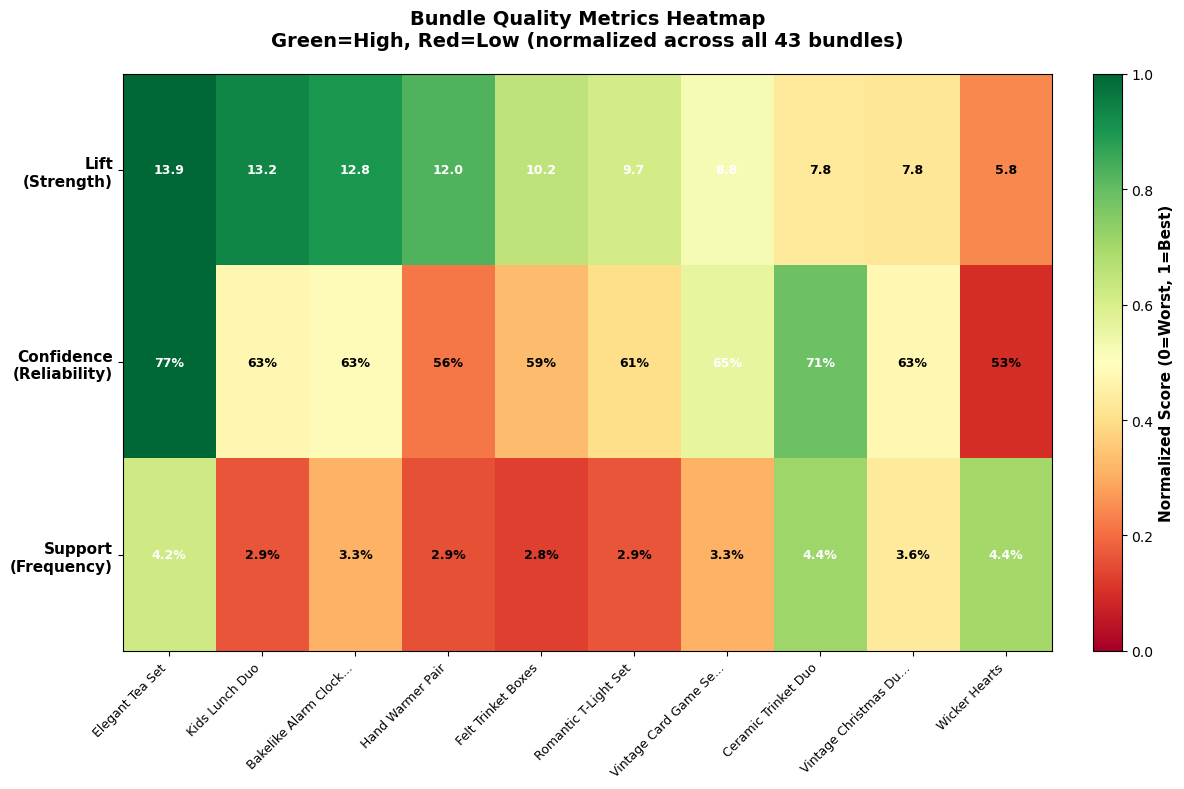

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

metrics_df = bundles[['bundle_name', 'support', 'confidence', 'lift']].copy()
metrics_df['support_norm'] = (metrics_df['support'] - pairs['support'].min()) / (pairs['support'].max() - pairs['support'].min())
metrics_df['confidence_norm'] = (metrics_df['confidence'] - pairs['confidence'].min()) / (pairs['confidence'].max() - pairs['confidence'].min())
metrics_df['lift_norm'] = (metrics_df['lift'] - pairs['lift'].min()) / (pairs['lift'].max() - pairs['lift'].min())

heatmap_data = metrics_df[['lift_norm', 'confidence_norm', 'support_norm']].values.T

im = ax.imshow(heatmap_data, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)


ax.set_xticks(np.arange(len(bundles)))
ax.set_yticks(np.arange(3))
ax.set_xticklabels([name[:20] + '...' if len(name) > 20 else name for name in bundles['bundle_name']], 
                   rotation=45, ha='right', fontsize=9)
ax.set_yticklabels(['Lift\n(Strength)', 'Confidence\n(Reliability)', 'Support\n(Frequency)'], 
                  fontsize=11, fontweight='bold')

for i in range(3):
    for j in range(len(bundles)):
        if i == 0: 
            text = f"{bundles.iloc[j]['lift']:.1f}"
        elif i == 1:
            text = f"{bundles.iloc[j]['confidence']:.0%}"
        else:
            text = f"{bundles.iloc[j]['support']:.1%}"
        
        color = 'white' if heatmap_data[i, j] > 0.5 else 'black'
        ax.text(j, i, text, ha='center', va='center', color=color, 
               fontsize=9, fontweight='bold')

# Colorbar
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Normalized Score (0=Worst, 1=Best)', fontsize=11, fontweight='bold')

ax.set_title('Bundle Quality Metrics Heatmap\nGreen=High, Red=Low (normalized across all 43 bundles)', 
            fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../outputs/visualizations/metrics_heatmap.pdf', bbox_inches='tight', dpi=300)
plt.savefig('../outputs/visualizations/metrics_heatmap.png', bbox_inches='tight', dpi=300)
print("\n✓ Saved: metrics_heatmap")
plt.show()


✓ Saved: radar_charts


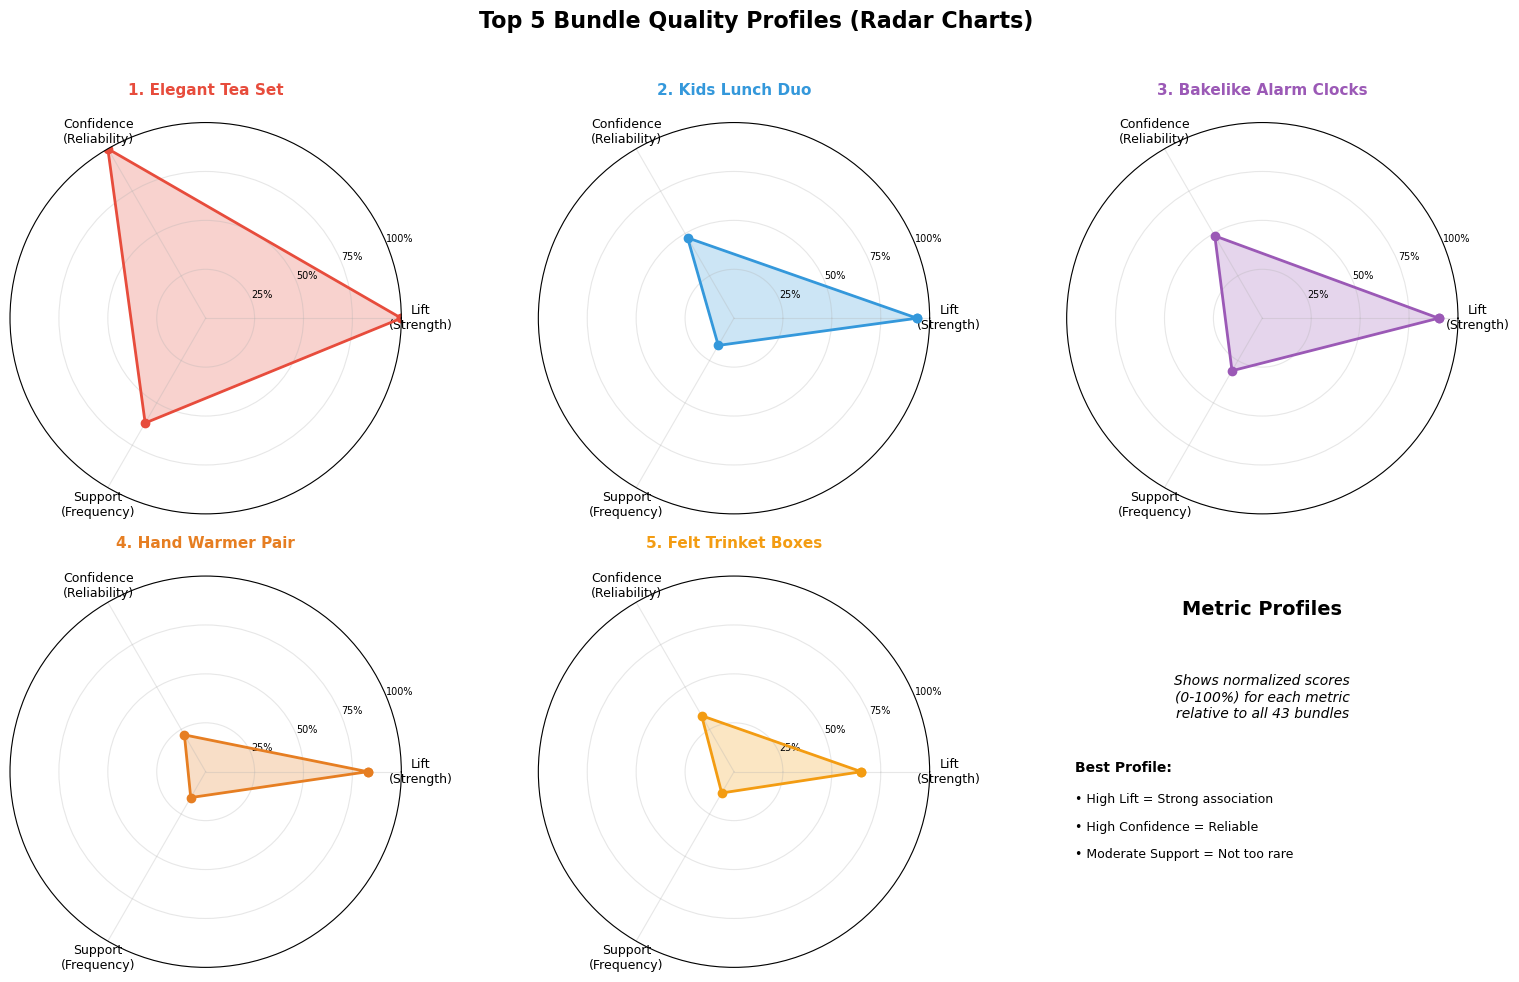

In [ ]:

from math import pi

fig = plt.figure(figsize=(16, 10))

categories = ['Lift\n(Strength)', 'Confidence\n(Reliability)', 'Support\n(Frequency)']
N = len(categories)

colors = ['#e74c3c', '#3498db', '#9b59b6', '#e67e22', '#f39c12']

for idx in range(5):
    ax = plt.subplot(2, 3, idx+1, projection='polar')
    
    bundle = bundles.iloc[idx]

    values = [
        (bundle['lift'] - pairs['lift'].min()) / (pairs['lift'].max() - pairs['lift'].min()),
        (bundle['confidence'] - pairs['confidence'].min()) / (pairs['confidence'].max() - pairs['confidence'].min()),
        (bundle['support'] - pairs['support'].min()) / (pairs['support'].max() - pairs['support'].min())
    ]
    values += values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax.plot(angles, values, 'o-', linewidth=2, color=colors[idx], label=bundle['bundle_name'])
    ax.fill(angles, values, alpha=0.25, color=colors[idx])
    
    # Labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=9)
    ax.set_ylim(0, 1)
    ax.set_yticks([0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels(['25%', '50%', '75%', '100%'], fontsize=7)
    ax.grid(True, alpha=0.3)
    
    # Title
    ax.set_title(f"{idx+1}. {bundle['bundle_name']}", 
                fontsize=11, fontweight='bold', pad=20, color=colors[idx])

ax = plt.subplot(2, 3, 6)
ax.axis('off')
ax.text(0.5, 0.9, 'Metric Profiles', fontsize=14, fontweight='bold', 
        ha='center', transform=ax.transAxes)
ax.text(0.5, 0.75, 'Shows normalized scores\n(0-100%) for each metric\nrelative to all 43 bundles', 
        fontsize=10, ha='center', va='top', style='italic', transform=ax.transAxes)

ax.text(0.1, 0.5, 'Best Profile:', fontsize=10, fontweight='bold', transform=ax.transAxes)
ax.text(0.1, 0.42, '• High Lift = Strong association', fontsize=9, transform=ax.transAxes)
ax.text(0.1, 0.35, '• High Confidence = Reliable', fontsize=9, transform=ax.transAxes)
ax.text(0.1, 0.28, '• Moderate Support = Not too rare', fontsize=9, transform=ax.transAxes)

plt.suptitle('Top 5 Bundle Quality Profiles (Radar Charts)', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig('../outputs/visualizations/radar_charts.pdf', bbox_inches='tight', dpi=300)
plt.savefig('../outputs/visualizations/radar_charts.png', bbox_inches='tight', dpi=300)
print("\n✓ Saved: radar_charts")
plt.show()